# TITANIC SURVIVAL 

## IMPORT THE NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
pd.options.display.float_format = '{:.2f}'.format

In [2]:
train = pd.read_csv('../input/titanic/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


- DATA INFORMATION

In [3]:
train.shape

(891, 12)

In [4]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

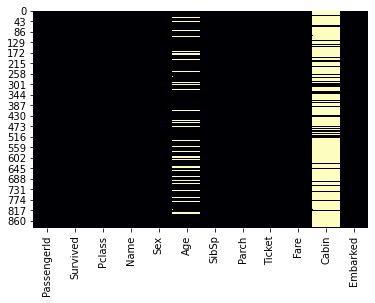

In [8]:
sns.heatmap(train.isnull(),cmap='magma',cbar = False)

## DATA INSIGHTS

### SURVIVAL PERCENTAGE

In [9]:
sur = train['Survived'].value_counts()
survival_rate = [sur[0]/len(train)*100,sur[1]/len(train)*100]

Text(0.5, 1.0, 'SURVIVAL CHART')

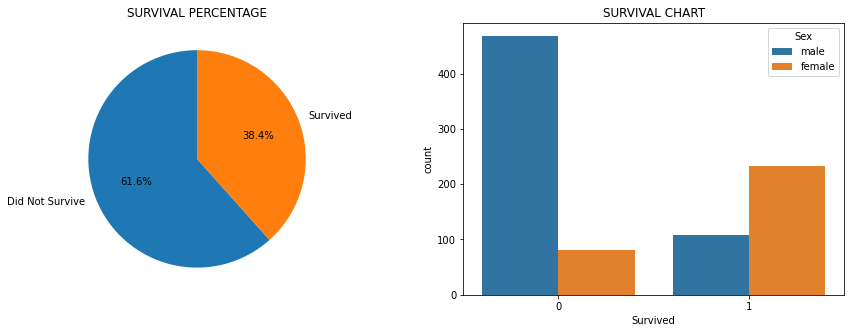

In [10]:
fig,ax = plt.subplots(nrows=1,ncols = 2,figsize = (15,5))
plt.subplot(1,2,1)
plt.pie(survival_rate,labels = ['Did Not Survive','Survived'],autopct='%1.1f%%',startangle = 90,)
plt.title('SURVIVAL PERCENTAGE')
plt.subplot(1,2,2)
sns.countplot('Survived',data = train,hue = 'Sex')
plt.title('SURVIVAL CHART')

### GENDER WISE  SURVIVAL PERCENTAGE

In [11]:
survived_male = len(train[(train['Sex'] == 'male') & (train['Survived'] == 1)])/len(train[train['Sex'] == 'male'])*100
survived_female = len(train[(train['Sex'] == 'female') & (train['Survived'] == 1)])/len(train[train['Sex'] == 'female'])*100
male = [survived_male,100-survived_male]
female = [survived_female,100-survived_female]

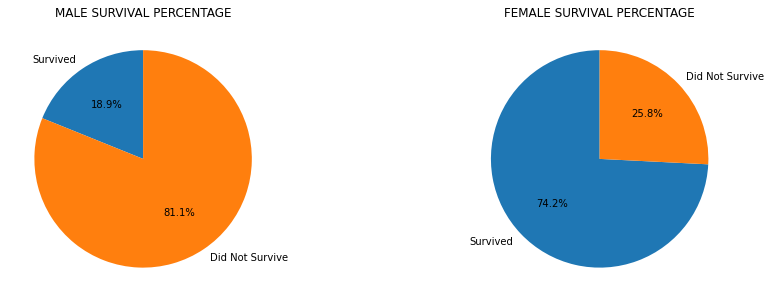

In [12]:
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
plt.subplot(1,2,1)
plt.pie(male,labels = ['Survived','Did Not Survive'],autopct='%1.1f%%',startangle = 90)
plt.title('MALE SURVIVAL PERCENTAGE')
plt.subplot(1,2,2)
plt.pie(female,labels = ['Survived','Did Not Survive'],autopct='%1.1f%%',startangle = 90)
plt.title('FEMALE SURVIVAL PERCENTAGE')
plt.show()

### PASSENGER CLASS SURVIVAL PERCENTAGE

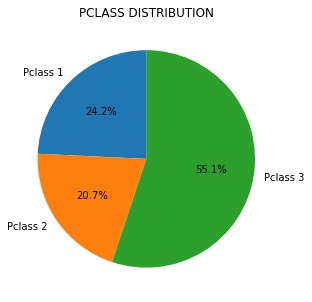

In [13]:
plt.subplots(figsize = (15,5))
Pclass = [len(train[(train['Pclass'] == 1)])/len(train)*100,len(train[(train['Pclass'] == 2)])/len(train)*100,len(train[(train['Pclass'] == 3)])/len(train)*100]
plt.pie(Pclass,labels = ['Pclass 1','Pclass 2','Pclass 3'],autopct='%1.1f%%',startangle = 90)
plt.title('PCLASS DISTRIBUTION')
plt.show()

In [14]:
survived_class_1 = len(train[(train['Pclass'] == 1) & train['Survived'] == 1])/len(train[(train['Pclass'] == 1)])*100
survived_class_2 = len(train[(train['Pclass'] == 2) & train['Survived'] == 1])/len(train[(train['Pclass'] == 2)])*100
survived_class_3 = len(train[(train['Pclass'] == 3) & train['Survived'] == 1])/len(train[(train['Pclass'] == 3)])*100
class_1 = [survived_class_1,100-survived_class_1]
class_2 = [survived_class_2,100-survived_class_2]
class_3 = [survived_class_3,100-survived_class_3]

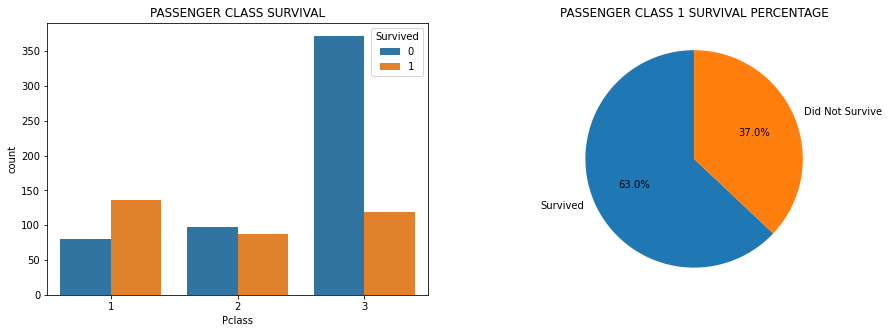

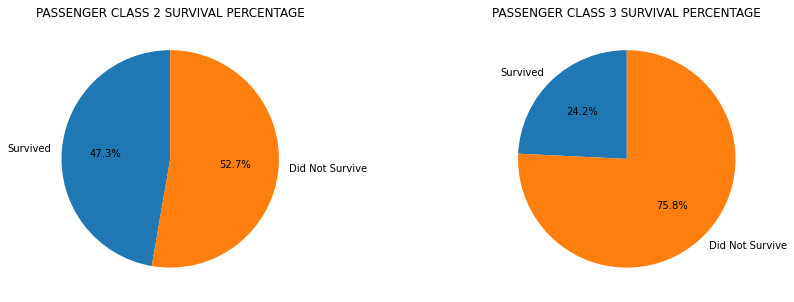

In [15]:
fig,ax = plt.subplots(nrows = 1, ncols = 2,figsize = (15,5))
plt.subplot(1,2,1)
sns.countplot('Pclass',data = train,hue = 'Survived')
plt.title('PASSENGER CLASS SURVIVAL',)
plt.subplot(1,2,2)
plt.pie(class_1,labels = ['Survived','Did Not Survive'],autopct='%1.1f%%',startangle = 90)
plt.title('PASSENGER CLASS 1 SURVIVAL PERCENTAGE')
plt.show()

fig,ax = plt.subplots(nrows = 1, ncols = 2,figsize = (15,5))
plt.subplot(1,2,1)
plt.pie(class_2,labels = ['Survived','Did Not Survive'],autopct='%1.1f%%',startangle = 90)
plt.title('PASSENGER CLASS 2 SURVIVAL PERCENTAGE')
plt.subplot(1,2,2)
plt.pie(class_3,labels = ['Survived','Did Not Survive'],autopct='%1.1f%%',startangle = 90)
plt.title('PASSENGER CLASS 3 SURVIVAL PERCENTAGE')
plt.show()

### EMBARKED SURVIVAL PERCENTAGE 

In [16]:
survived_S = len(train[(train['Embarked'] == 'S') & (train['Survived'] == 1)])/len(train[train['Embarked'] == 'S'])*100
survived_C = len(train[(train['Embarked'] == 'C') & (train['Survived'] == 1)])/len(train[train['Embarked'] == 'C'])*100
survived_Q = len(train[(train['Embarked'] == 'Q') & (train['Survived'] == 1)])/len(train[train['Embarked'] == 'Q'])*100
S = [survived_S,100-survived_S]
C = [survived_C,100-survived_C]
Q = [survived_Q,100-survived_Q]

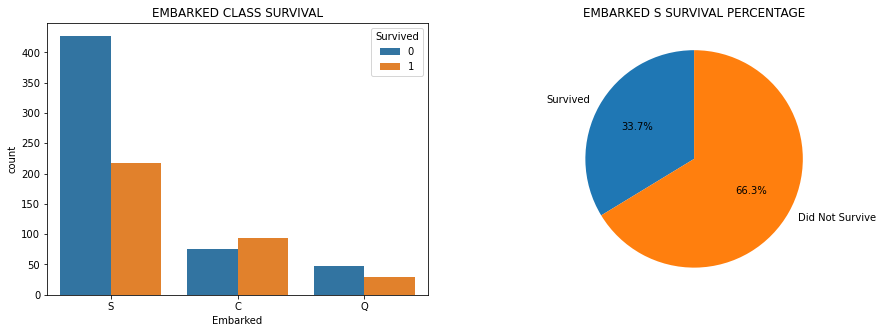

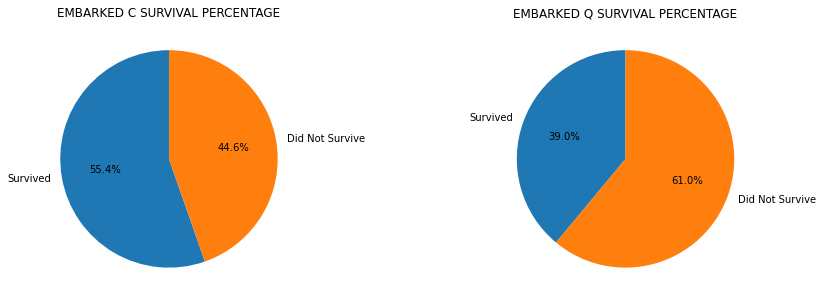

In [17]:
fig,ax = plt.subplots(nrows = 1, ncols = 2,figsize = (15,5))
plt.subplot(1,2,1)
sns.countplot('Embarked',data = train,hue = 'Survived')
plt.title('EMBARKED CLASS SURVIVAL')
plt.subplot(1,2,2)
plt.pie(S,labels = ['Survived','Did Not Survive'],autopct='%1.1f%%',startangle = 90)
plt.title('EMBARKED S SURVIVAL PERCENTAGE')
plt.show()

fig,ax = plt.subplots(nrows = 1, ncols = 2,figsize = (15,5))
plt.subplot(1,2,1)
plt.pie(C,labels = ['Survived','Did Not Survive'],autopct='%1.1f%%',startangle = 90)
plt.title('EMBARKED C SURVIVAL PERCENTAGE')
plt.subplot(1,2,2)
plt.pie(Q,labels = ['Survived','Did Not Survive'],autopct='%1.1f%%',startangle = 90)
plt.title('EMBARKED Q SURVIVAL PERCENTAGE')
plt.show()

### FARE & SURVIVAL

In [ ]:
fig,ax = plt.subplots(figsize = (15,5))
sns.distplot(train['Fare'],label = 'Fare')
sns.distplot(train[train['Survived'] == 1]['Fare'],label = 'Survived')
sns.distplot(train[train['Survived'] == 0]['Fare'],label = 'Did Not Survive')
plt.title('DISTRIBUTION OF FARE')
plt.legend()
plt.show()

### 'SibSp' & 'Parch' PLOTS W.R.T 'SURVIVED' 

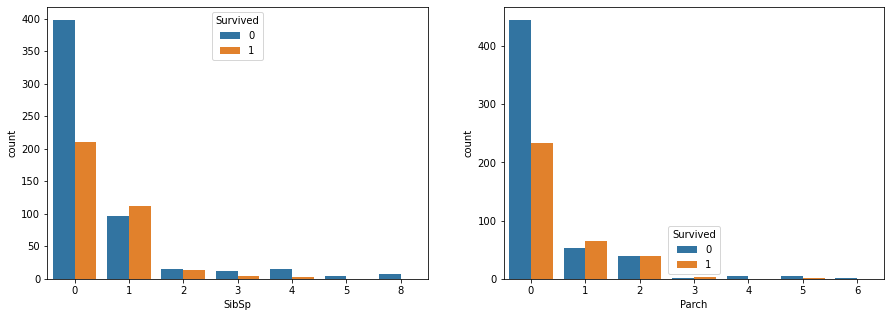

In [19]:
fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
plt.subplot(1,2,1)
sns.countplot('SibSp',data = train,hue = 'Survived')
plt.subplot(1,2,2)
sns.countplot('Parch',data = train,hue = 'Survived')
plt.show()

- FILL THE MISSING VALUES IN THE DATA 

In [20]:
train['Age'].mode()

0   24.00
dtype: float64

In [21]:
train['Age'].median()

28.0

In [22]:
train['Age'].mean()

29.69911764705882

In [23]:
train['Age_Mode'] = train['Age'].fillna(value = 24)
train['Age_Med'] = train['Age'].fillna(train['Age'].median())
train['Age_Mean'] = train['Age'].fillna(train['Age'].mean())

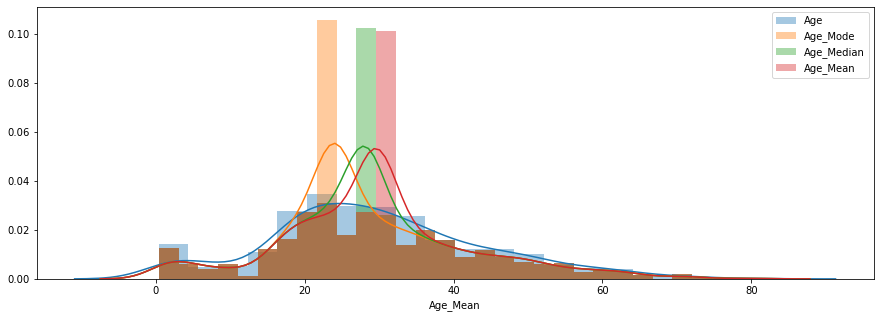

In [24]:
fig,ax = plt.subplots(figsize = (15,5))
sns.distplot(train['Age'],label = 'Age')
sns.distplot(train['Age_Mode'],label = 'Age_Mode')
sns.distplot(train['Age_Med'],label = 'Age_Median',)
sns.distplot(train['Age_Mean'],label = 'Age_Mean')
plt.legend()
plt.show()

- WE WILL USE THE MEDIAN VALUE

In [25]:
train['Age'] = train['Age'].fillna(train['Age'].median())
train = train.drop(columns= ['Age_Mode','Age_Med','Age_Mean'])
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


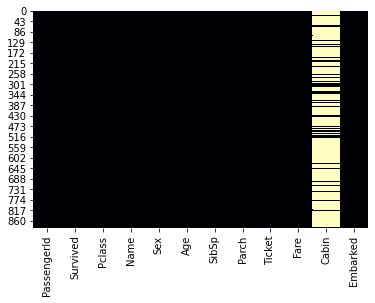

In [26]:
sns.heatmap(train.isnull(),cmap='magma',cbar = False)

In [27]:
def get_age_group(dataframe,column_name):
    
    dataframe[column_name] = dataframe[column_name].apply(np.ceil)
    age_group = {0:list(range(0,21)),1:list(range(21,41)),2:list(range(41,61)),3:list(range(61,81))}
    col = list(dataframe.columns)
    index = col.index(column_name)
    age = []
    
    for j in range(len(dataframe)):
        for k in age_group.keys():
            for i in range(len(age_group[k])):
                if (age_group[k][i] == dataframe.iloc[j,index]):
                    age.append(k)
    dataframe['Age_Group'] = age

In [28]:
get_age_group(train,'Age')

### AGE & SURVIVAL

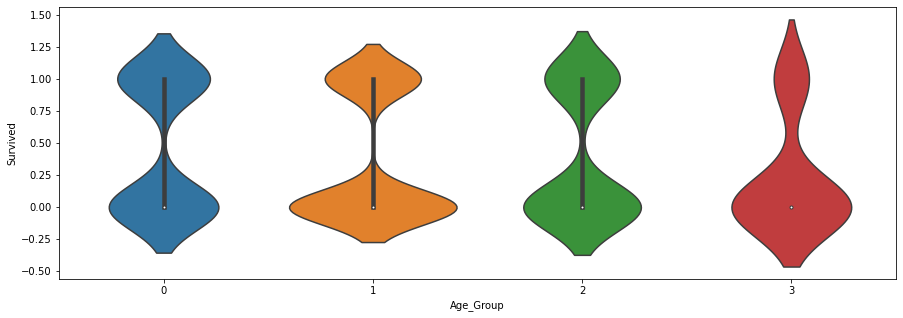

In [29]:
plt.subplots(figsize = (15,5))
sns.violinplot('Age_Group','Survived',data = train)
plt.show()

### FARE & AGE w.r.t SURVIVED

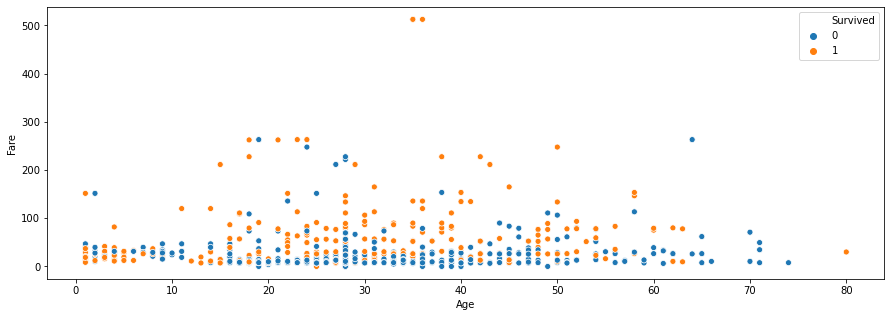

In [30]:
plt.subplots(figsize = (15,5))
sns.scatterplot('Age','Fare',data = train,hue = 'Survived')

In [31]:
def get_initials(dataframe,column_name):
    sub = []
    initials = ['Mrs.','Ms.','Mr.','Miss.','Master.','Lady.','Don.','Rev.','Dr.','Mme.','Major.','Sir.','Mlle.','Col.','Capt.','Countess.','Jonkheer.','Dona.']
    name = dataframe[column_name]
    for i in range(len(name)):
        split_names = name[i].split()
        for j in range(len(split_names)):
            if (split_names[j] in initials):
                sub.append(split_names[j])
    dataframe[column_name] = sub

In [32]:
get_initials(train,'Name')
train['Name'].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Major.         2
Col.           2
Don.           1
Countess.      1
Capt.          1
Ms.            1
Mme.           1
Jonkheer.      1
Sir.           1
Lady.          1
Name: Name, dtype: int64

### INITIALS & AGE

In [33]:
le = LabelEncoder()
train['Name'] = le.fit_transform(train['Name'])
encoded_values = train['Name'].unique()
decoded_values = le.inverse_transform(encoded_values)
initials = {}
for i in range(len(encoded_values)):
    initials.setdefault(decoded_values[i],encoded_values[i])

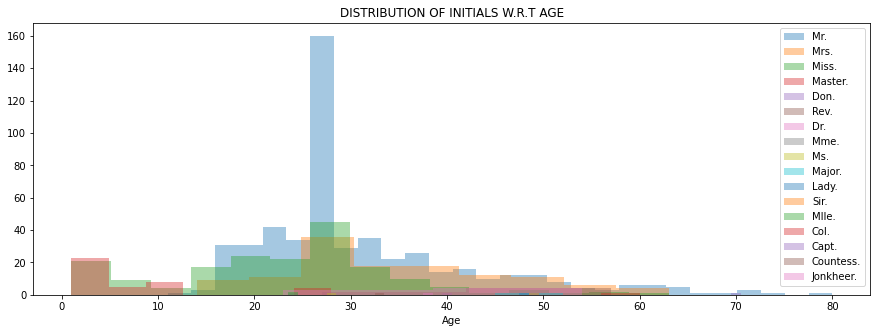

In [34]:
plt.subplots(figsize = (15,5))
for keys,values in initials.items():
    sns.distplot(train[train['Name'] == values]['Age'],label = keys,kde = False)
plt.title('DISTRIBUTION OF INITIALS W.R.T AGE')
plt.legend()
plt.show()

### INITIALS & AGE GROUP

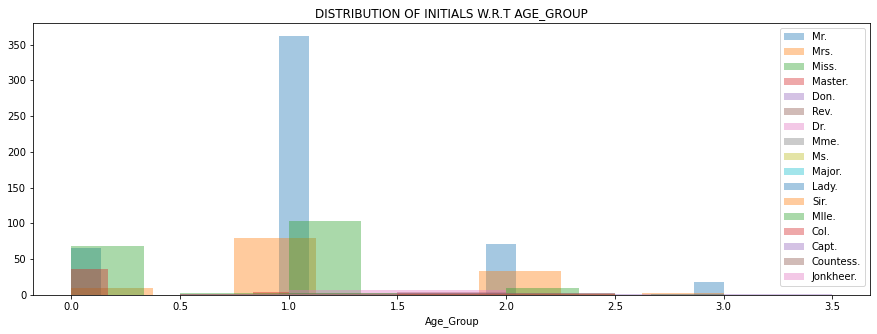

In [35]:
plt.subplots(figsize = (15,5))
for keys,values in initials.items():
    sns.distplot(train[train['Name'] == values]['Age_Group'],label = keys,kde = False)
plt.title('DISTRIBUTION OF INITIALS W.R.T AGE_GROUP')
plt.legend()
plt.show()

### SURVIVAL vs INITIALS 

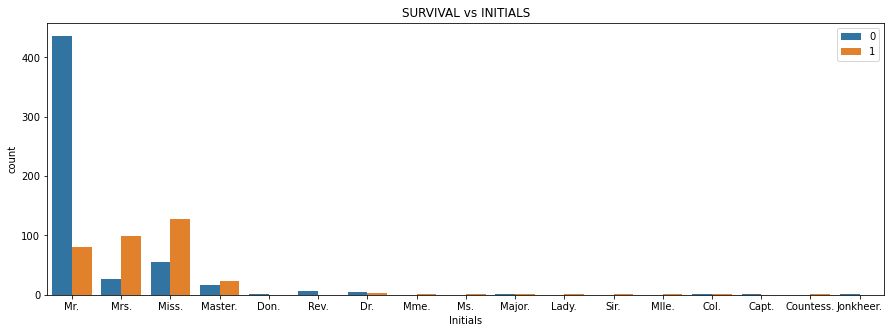

In [36]:
train['Name'] = le.inverse_transform(train['Name'])
plt.subplots(figsize = (15,5))
sns.countplot('Name',data = train,hue = 'Survived')
plt.xlabel('Initials')
plt.title('SURVIVAL vs INITIALS')
plt.legend()
plt.show()

## INSIGHTS
- FEMALE PASSENGERS WERE SAVED MORE THAN MALE PASSENGERS
- CLASS 1, CLASS 2, CLASS 3 WAS ALSO CONSIDERED WHILE SAVING THE PASSENGERS
- NO SUCH PREFERENCE CAN BE SAID ABOUT THE PASSENGERS BASED ON PORT OF EMBARKATION
- 'Parch' & 'SibSp' DON'T GIVE US MUCH ABOUT THE DATA [MAYBE I NEED TO WORK ON THIS FACTOR ]
- DISTRIBUTION OF 'FARE' SHOWS PREFERENCE GIVEN TO PEOPLE HAVING PAID MORE FOR FARE THAN OTHERS
- PROBABLY BECAUSE OF CLASS 1, CLASS 2, CLASS 3
- WE ALSO CHECKED THE SURVIVAL OF PASSENGERS W.R.T THEIR INITIALS WHICH CAN HELP FOR BETTER RESULTS
- 'AGE' CLEARLY SHOWS A BULGE AT VALUE 28 WHICH WE FILLED IN PLACE OF 'NAN'
- WE WILL DROP 'PassengerId','TICKET','CABIN'

# FEATURE SELECTION

- CONVERTING CATEGORICAL VALUES INTO NUMERICAL VALUES

In [37]:
train['Name'] = le.fit_transform(train['Name'])
train['Sex'] = le.fit_transform(train['Sex'])
embarked = {0:'S',1:'C',2:'Q'}
train['Embarked'] = train['Embarked'].fillna('Q')
train['Embarked'] = le.fit_transform(train['Embarked'])

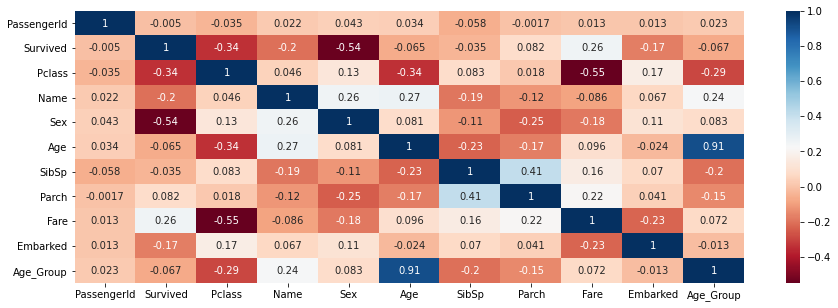

In [38]:
plt.subplots(figsize = (15,5))
sns.heatmap(train.corr(),cmap = 'RdBu',cbar = True,annot = True)

In [39]:
train = train.drop(columns = ['PassengerId','Ticket','Cabin','Age_Group'])
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,12,1,22.00,1,0,7.25,2
1,1,1,13,0,38.00,1,0,71.28,0
2,1,3,9,0,26.00,0,0,7.92,2
3,1,1,13,0,35.00,1,0,53.10,2
4,0,3,12,1,35.00,0,0,8.05,2


### USING CHI-SQUARRED METHOD 

In [40]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [41]:
features = train.iloc[:,1:]
target = train.iloc[:,0]

In [42]:
best_features = SelectKBest(score_func = chi2,k = 8)
fit = best_features.fit(features,target)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(features.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Column','Score'] 
print(featureScores.nlargest(8,'Score'))

     Column   Score
6      Fare 4518.32
2       Sex   92.70
0    Pclass   30.87
3       Age   21.86
1      Name   11.18
7  Embarked   10.66
5     Parch   10.10
4     SibSp    2.58


# FEATURE SELECTED
- FEATURES LIKE 'Pclass','Name','Sex','Embarked' SHOW NEGATIVE CORRELATION W.R.T 'SURVIVED'
- FEATURE 'Fare' SHOWS POSITIVE CORRELATION W.R.T 'SURVIVED'
- OTHER FEATURES PRETTY MUCH SHOWS NO CORRELATION W.R.T 'SURVIVED'
- 'Fare' & 'Pclass' ARE SHOWS NEGATIVE CORRELATION WITH EACH OTHER BECAUSE OF THE CLASS SYSTEM
- FOR PREDICTION PURPOSE, WE WILL USE FEATURES 'Fare','Pclass','Sex' & 'Name'
- WE WILL DROP 'Embarked' AS IT SEEMS LIKE A FEATURE WHICH DOES NOT ADD UP MUCH FOR PREDICTION 

In [43]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,12,1,22.00,1,0,7.25,2
1,1,1,13,0,38.00,1,0,71.28,0
2,1,3,9,0,26.00,0,0,7.92,2
3,1,1,13,0,35.00,1,0,53.10,2
4,0,3,12,1,35.00,0,0,8.05,2


In [44]:
train = train.drop(columns = ['Embarked','SibSp','Parch'])
train.head()

,Survived,Pclass,Name,Sex,Age,Fare
0,0,3,12,1,22.00,7.25
1,1,1,13,0,38.00,71.28
2,1,3,9,0,26.00,7.92
3,1,1,13,0,35.00,53.10
4,0,3,12,1,35.00,8.05


In [45]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
features = train[['Pclass','Sex','Name','Fare']].values
features = sc.fit_transform(features)
target = train['Survived'].values

# MODELS

In [46]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.25, random_state = 2)

In [47]:
def model(classifier):
    
    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    print("ACCURACY : ",'{0:.2%}'.format(accuracy_score(y_test,prediction))) 
    print("CROSS VALIDATION SCORE : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = 10,scoring = 'accuracy').mean()))
    print("ROC_AUC SCORE : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
    plot_roc_curve(classifier, x_test,y_test)
    plt.title('ROC_AUC_PLOT')
    plt.show()

In [48]:
def model_evaluation(classifier):
    
    # CONFUSION MATRIX
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')
    
    tn,fp,fn,tp = cm.flatten()
    
    # PRECISION
    print('PRECISION : ','{0:.2%}'.format(tp/(tp + fp)))
    
    # RECALL
    print('RECALL : ','{0:.2%}'.format(tp/(tp + fn)))

In [49]:
def grid_search_cv(classifier,hyperparameters):
    
    GSCV = GridSearchCV(classifier,hyperparameters,cv = 10)
    model = GSCV.fit(x_test,y_test)
    print(model)
    print('HIGHEST ACCURACY : ','{0:.2%}'.format(model.best_score_))
    print('BEST PARAMETERS : ',model.best_params_)

## LOGISTIC REGRESSION

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
classifier_lr = LogisticRegression(random_state = 0,C=10,penalty= 'l2') 

ACCURACY :  76.68%
CROSS VALIDATION SCORE :  78.73%
ROC_AUC SCORE :  74.98%


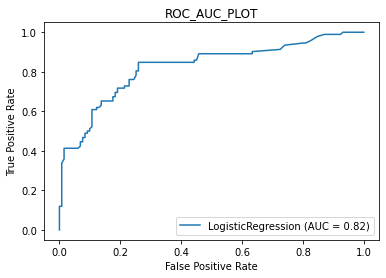

In [52]:
model(classifier_lr)

PRECISION :  75.00%
RECALL :  65.22%


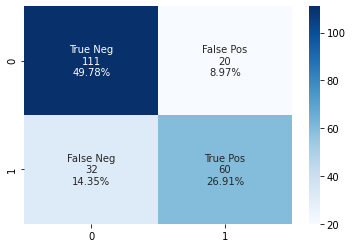

In [53]:
model_evaluation(classifier_lr)

## SUPPORT VECTOR CLASSIFIER

In [54]:
from sklearn.svm import SVC

In [55]:
classifier_svc = SVC(kernel = 'linear',C = 0.1)

In [56]:
hyperparameters = {'C' : [0.01,0.1,1,10,100]}
grid_search_cv(classifier_svc,hyperparameters)

GridSearchCV(cv=10, estimator=SVC(C=0.1, kernel='linear'),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]})
HIGHEST ACCURACY :  77.15%
BEST PARAMETERS :  {'C': 0.1}


ACCURACY :  77.13%
CROSS VALIDATION SCORE :  79.19%
ROC_AUC SCORE :  75.03%


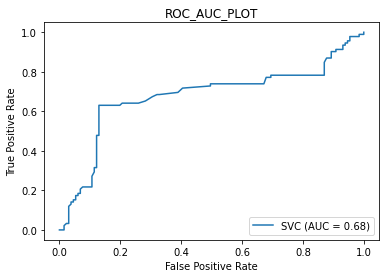

In [57]:
model(classifier_svc)

PRECISION :  77.33%
RECALL :  63.04%


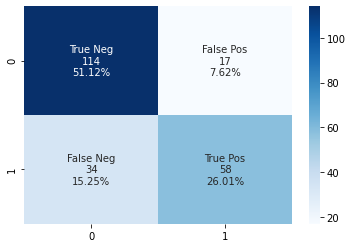

In [58]:
model_evaluation(classifier_svc)

## DECISION TREE 

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
classifier_dt = DecisionTreeClassifier(criterion = 'entropy')

ACCURACY :  82.51%
CROSS VALIDATION SCORE :  81.59%
ROC_AUC SCORE :  80.91%


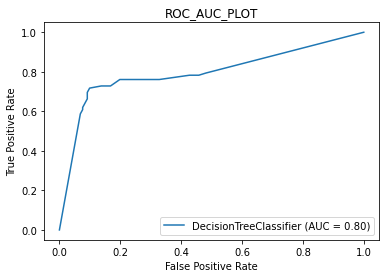

In [61]:
model(classifier_dt)

PRECISION :  83.54%
RECALL :  71.74%


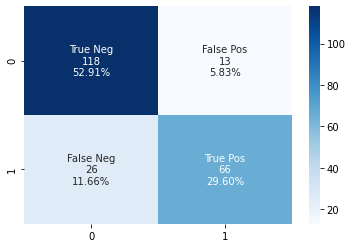

In [62]:
model_evaluation(classifier_dt)

## RANDOM FOREST

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
classifier_rf = RandomForestClassifier(max_depth = 2,random_state = 0)

ACCURACY :  78.03%
CROSS VALIDATION SCORE :  78.74%
ROC_AUC SCORE :  76.12%


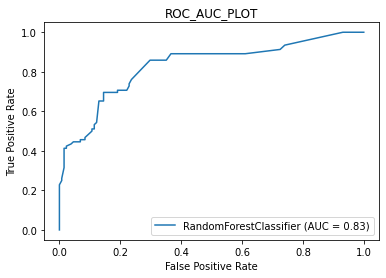

In [65]:
model(classifier_rf)

PRECISION :  77.92%
RECALL :  65.22%


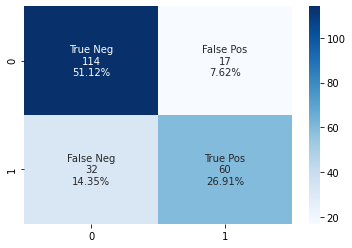

In [66]:
model_evaluation(classifier_rf)

## K-NEAREST NEIGHBORS

In [67]:
from sklearn.neighbors import KNeighborsClassifier

In [68]:
classifier_knn = KNeighborsClassifier(leaf_size = 7, n_neighbors = 3,p = 1)

In [69]:
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
grid_search_cv(classifier_knn,hyperparameters)

GridSearchCV(cv=10,
             estimator=KNeighborsClassifier(leaf_size=7, n_neighbors=3, p=1),
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29],
                         'p': [1, 2]})
HIGHEST ACCURACY :  78.97%
BEST PARAMETERS :  {'leaf_size': 7, 'n_neighbors': 3, 'p': 1}


ACCURACY :  81.17%
CROSS VALIDATION SCORE :  81.00%
ROC_AUC SCORE :  79.92%


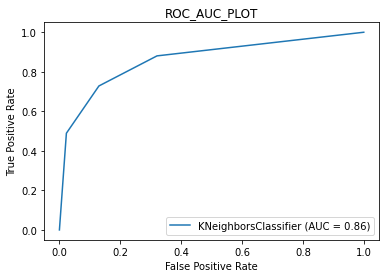

In [70]:
model(classifier_knn)

PRECISION :  79.76%
RECALL :  72.83%


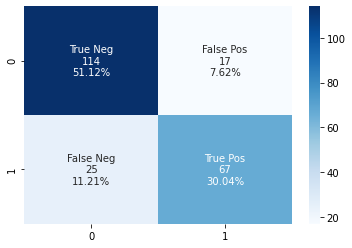

In [71]:
model_evaluation(classifier_knn)

# MODEL COMPARISON

In [72]:
models = {'MODELS':['LOGISTIC REGRESSION','SUPPORT VECTOR CLASSIFIER','DECISION TREE CLASSIFIER','RANDOM FOREST CLASSIFIER','K-NEAREST NEIGHBORS'],
         'CROSS VAL ACCURACY (%)':[78.73,79.19,81.59,78.29,81.10]}

In [73]:
cross_val = pd.DataFrame(models)
cross_val.head()

,MODELS,CROSS VAL ACCURACY (%)
0,LOGISTIC REGRESSION,78.73
1,SUPPORT VECTOR CLASSIFIER,79.19
2,DECISION TREE CLASSIFIER,81.59
3,RANDOM FOREST CLASSIFIER,78.29
4,K-NEAREST NEIGHBORS,81.10


- ### FROM THE ABOVE DATAFRAME, WE CHOOSE THE MODEL WITH THE HIGHEST CROSS VALIDATION ACCURACY,AUC SCORE & LEARNING RATE GRAPH
- ### WE WILL SELECT EITHER DECISION TREE CLASSIFIER / K-NEAREST NEIGHBORS 
- ### AFTER USING BOTH THE CLASSIFIERS, I GOT BEST RESULTS USING K-NEAREST NEIGHBORS

# PREDICTION ON TEST DATASET

In [74]:
test = pd.read_csv('../input/titanic/test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.50,0,0,330911,7.83,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00,1,0,363272,7.00,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00,0,0,240276,9.69,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.00,0,0,315154,8.66,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00,1,1,3101298,12.29,NaN,S


## PREPROCESSING ON TEST DATASET

### DROP THE UNNECESSARY COLUMNS

In [75]:
passenger_id = test['PassengerId']
test = test.drop(columns = ['PassengerId','Age','SibSp','Parch','Ticket','Cabin','Embarked'])
test.head()

,Pclass,Name,Sex,Fare
0,3,"Kelly, Mr. James",male,7.83
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,7.00
2,2,"Myles, Mr. Thomas Francis",male,9.69
3,3,"Wirz, Mr. Albert",male,8.66
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,12.29


In [76]:
test.isnull().sum()

Pclass    0
Name      0
Sex       0
Fare      1
dtype: int64

- FILLING THE 'NAN' VALUES IN TEST DATASET SIMILAR TO TRAIN DATASET

In [77]:
test['Fare'].mode()

0   7.75
dtype: float64

In [78]:
test['Fare'] = test['Fare'].fillna(7.75)

- EXTRACTING THE INITIALS OF THE PASSENGERS & CONVERTING CATEGORICAL DATA TO NUMERICAL DATA

In [79]:
get_initials(test,'Name')
test['Name'] = le.fit_transform(test['Name'])
test['Sex'] = le.fit_transform(test['Sex'])
test.head()

,Pclass,Name,Sex,Fare
0,3,5,1,7.83
1,3,6,0,7.00
2,2,5,1,9.69
3,3,5,1,8.66
4,3,6,0,12.29


In [80]:
test = sc.fit_transform(test)

In [81]:
prediction = classifier_knn.predict(test)
submission = pd.DataFrame({'PassengerId':passenger_id,'Survived':prediction})
submission.to_csv('TITANIC_SUBMISSION.csv',index = False)
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


# END